In [5]:
suppressMessages(library(data.table))
suppressMessages(library(dplyr))
suppressMessages(library(stringr))

suppressMessages(library(RColorBrewer))
suppressMessages(library(car))
suppressMessages(library(plotly))
suppressMessages(library(crosstalk))
suppressMessages(library(ellipsis))
suppressMessages(library(Rtsne))
suppressMessages(library(ggrepel))
suppressMessages(library(ComplexHeatmap))
suppressMessages(library(tidyverse))
library(pheatmap)
library(NMF)

In [6]:
results.dir = "/nfs/lab/projects/mega_heart/FNIH/multiome/Analysis/3_downstream/Major_celltypes/LDSC/Results"


In [7]:
# Grep onlu results that end in "results"
result_files = list.files(results.dir, 
           pattern = "\\.results$")
length(result_files)

[1] 3612

In [8]:
rna_color = colorRampPalette(c("white", "#59b4a2"))(25)
atac_color =  colorRampPalette(c("white", "#036EB8"))(25)
ac_color =  colorRampPalette(c("white", "#2EA7E0"))(25)
me3_color =  colorRampPalette(c("white", "#956134"))(25)

celltypes = c('aCM','Adipocyte','Endocardial','Endothelial','Epicardial','Fibroblast',
'Lymphoid','Myeloid','Neuronal','Pericyte','SM','vCM')

# Load data

In [9]:
setwd(results.dir)
results_combined <- data.frame()
for (x in result_files){
    file = x
    # CVDK_Format
    trait <- str_split_fixed(x, '_hg19', n=2)[1]
    # FinGenn_Format
    trait = gsub('.gz', '', trait)
    
    celltype <- str_split_fixed(x, '_hg19.', n=2)[2]
    celltype <- str_split_fixed(celltype, '.results', n=2)[1]
    message("Processing: ", celltype, " - ", trait)
    result <- fread(x)
    result <- result[1,c(5,6,7,8,9,10)]
    result$file <- file
    result$trait <- trait
    result$celltype <- celltype
    results_combined <- rbind(results_combined, result) 
}
results_combined$Enrichment_padj_BH <- p.adjust(results_combined$Enrichment_p, method='BH')
write.table(
  results_combined, 
  "/nfs/lab/projects/mega_heart/FNIH/multiome/Analysis/3_downstream/Major_celltypes/LDSC/FinnGen_CDVKP_MVP.resultsPerCelltype.txt",
  sep = "\t",            
  quote = FALSE,         
  row.names = FALSE,     
  col.names = TRUE       
)

Processing: aCM - 0321_asat_bgen_stats

Processing: Adipocyte - 0321_asat_bgen_stats

Processing: Endocardial - 0321_asat_bgen_stats

Processing: Endothelial - 0321_asat_bgen_stats

Processing: Epicardial - 0321_asat_bgen_stats

Processing: Fibroblast - 0321_asat_bgen_stats

Processing: Lymphoid - 0321_asat_bgen_stats

Processing: Myeloid - 0321_asat_bgen_stats

Processing: Neuronal - 0321_asat_bgen_stats

Processing: Pericyte - 0321_asat_bgen_stats

Processing: SM - 0321_asat_bgen_stats

Processing: vCM - 0321_asat_bgen_stats

Processing: aCM - 0321_asat_Female_bgen_stats

Processing: Adipocyte - 0321_asat_Female_bgen_stats

Processing: Endocardial - 0321_asat_Female_bgen_stats

Processing: Endothelial - 0321_asat_Female_bgen_stats

Processing: Epicardial - 0321_asat_Female_bgen_stats

Processing: Fibroblast - 0321_asat_Female_bgen_stats

Processing: Lymphoid - 0321_asat_Female_bgen_stats

Processing: Myeloid - 0321_asat_Female_bgen_stats

Processing: Neuronal - 0321_asat_Female_bgen_

Processing: Adipocyte - 0321_gfatadjbmi3_Female_bgen_stats

Processing: Endocardial - 0321_gfatadjbmi3_Female_bgen_stats

Processing: Endothelial - 0321_gfatadjbmi3_Female_bgen_stats

Processing: Epicardial - 0321_gfatadjbmi3_Female_bgen_stats

Processing: Fibroblast - 0321_gfatadjbmi3_Female_bgen_stats

Processing: Lymphoid - 0321_gfatadjbmi3_Female_bgen_stats

Processing: Myeloid - 0321_gfatadjbmi3_Female_bgen_stats

Processing: Neuronal - 0321_gfatadjbmi3_Female_bgen_stats

Processing: Pericyte - 0321_gfatadjbmi3_Female_bgen_stats

Processing: SM - 0321_gfatadjbmi3_Female_bgen_stats

Processing: vCM - 0321_gfatadjbmi3_Female_bgen_stats

Processing: aCM - 0321_gfatadjbmi3_Male_bgen_stats

Processing: Adipocyte - 0321_gfatadjbmi3_Male_bgen_stats

Processing: Endocardial - 0321_gfatadjbmi3_Male_bgen_stats

Processing: Endothelial - 0321_gfatadjbmi3_Male_bgen_stats

Processing: Epicardial - 0321_gfatadjbmi3_Male_bgen_stats

Processing: Fibroblast - 0321_gfatadjbmi3_Male_bgen_stats

Proc

Processing: Pericyte - 0321_vatGfatRatio_Female_bgen_stats

Processing: SM - 0321_vatGfatRatio_Female_bgen_stats

Processing: vCM - 0321_vatGfatRatio_Female_bgen_stats

Processing: aCM - 0321_vatGfatRatio_Male_bgen_stats

Processing: Adipocyte - 0321_vatGfatRatio_Male_bgen_stats

Processing: Endocardial - 0321_vatGfatRatio_Male_bgen_stats

Processing: Endothelial - 0321_vatGfatRatio_Male_bgen_stats

Processing: Epicardial - 0321_vatGfatRatio_Male_bgen_stats

Processing: Fibroblast - 0321_vatGfatRatio_Male_bgen_stats

Processing: Lymphoid - 0321_vatGfatRatio_Male_bgen_stats

Processing: Myeloid - 0321_vatGfatRatio_Male_bgen_stats

Processing: Neuronal - 0321_vatGfatRatio_Male_bgen_stats

Processing: Pericyte - 0321_vatGfatRatio_Male_bgen_stats

Processing: SM - 0321_vatGfatRatio_Male_bgen_stats

Processing: vCM - 0321_vatGfatRatio_Male_bgen_stats

Processing: aCM - asso.LPA-allchr.fastGWA

Processing: Adipocyte - asso.LPA-allchr.fastGWA

Processing: Endocardial - asso.LPA-allchr.fastGWA

Processing: Fibroblast - finngen_R11_AUTOIMMUNE

Processing: Lymphoid - finngen_R11_AUTOIMMUNE

Processing: Myeloid - finngen_R11_AUTOIMMUNE

Processing: Neuronal - finngen_R11_AUTOIMMUNE

Processing: Pericyte - finngen_R11_AUTOIMMUNE

Processing: SM - finngen_R11_AUTOIMMUNE

Processing: vCM - finngen_R11_AUTOIMMUNE

Processing: aCM - finngen_R11_C_STROKE

Processing: Adipocyte - finngen_R11_C_STROKE

Processing: Endocardial - finngen_R11_C_STROKE

Processing: Endothelial - finngen_R11_C_STROKE

Processing: Epicardial - finngen_R11_C_STROKE

Processing: Fibroblast - finngen_R11_C_STROKE

Processing: Lymphoid - finngen_R11_C_STROKE

Processing: Myeloid - finngen_R11_C_STROKE

Processing: Neuronal - finngen_R11_C_STROKE

Processing: Pericyte - finngen_R11_C_STROKE

Processing: SM - finngen_R11_C_STROKE

Processing: vCM - finngen_R11_C_STROKE

Processing: aCM - finngen_R11_CARDIAC_ARRHYTM

Processing: Adipocyte - finngen_R11_CARDIAC_ARRHYTM

Processing: Endocardial - finngen_R11_CARDIAC_A

Processing: SM - finngen_R11_GEST_DIABETES

Processing: vCM - finngen_R11_GEST_DIABETES

Processing: aCM - finngen_R11_HYPOTE_DRUGS

Processing: Adipocyte - finngen_R11_HYPOTE_DRUGS

Processing: Endocardial - finngen_R11_HYPOTE_DRUGS

Processing: Endothelial - finngen_R11_HYPOTE_DRUGS

Processing: Epicardial - finngen_R11_HYPOTE_DRUGS

Processing: Fibroblast - finngen_R11_HYPOTE_DRUGS

Processing: Lymphoid - finngen_R11_HYPOTE_DRUGS

Processing: Myeloid - finngen_R11_HYPOTE_DRUGS

Processing: Neuronal - finngen_R11_HYPOTE_DRUGS

Processing: Pericyte - finngen_R11_HYPOTE_DRUGS

Processing: SM - finngen_R11_HYPOTE_DRUGS

Processing: vCM - finngen_R11_HYPOTE_DRUGS

Processing: aCM - finngen_R11_I9_ABAORTANEUR

Processing: Adipocyte - finngen_R11_I9_ABAORTANEUR

Processing: Endocardial - finngen_R11_I9_ABAORTANEUR

Processing: Endothelial - finngen_R11_I9_ABAORTANEUR

Processing: Epicardial - finngen_R11_I9_ABAORTANEUR

Processing: Fibroblast - finngen_R11_I9_ABAORTANEUR

Processing: Lymph

Processing: Epicardial - finngen_R11_I9_CABG

Processing: Fibroblast - finngen_R11_I9_CABG

Processing: Lymphoid - finngen_R11_I9_CABG

Processing: Myeloid - finngen_R11_I9_CABG

Processing: Neuronal - finngen_R11_I9_CABG

Processing: Pericyte - finngen_R11_I9_CABG

Processing: SM - finngen_R11_I9_CABG

Processing: vCM - finngen_R11_I9_CABG

Processing: aCM - finngen_R11_I9_CARDARR

Processing: Adipocyte - finngen_R11_I9_CARDARR

Processing: Endocardial - finngen_R11_I9_CARDARR

Processing: Endothelial - finngen_R11_I9_CARDARR

Processing: Epicardial - finngen_R11_I9_CARDARR

Processing: Fibroblast - finngen_R11_I9_CARDARR

Processing: Lymphoid - finngen_R11_I9_CARDARR

Processing: Myeloid - finngen_R11_I9_CARDARR

Processing: Neuronal - finngen_R11_I9_CARDARR

Processing: Pericyte - finngen_R11_I9_CARDARR

Processing: SM - finngen_R11_I9_CARDARR

Processing: vCM - finngen_R11_I9_CARDARR

Processing: aCM - finngen_R11_I9_CARDMSEC

Processing: Adipocyte - finngen_R11_I9_CARDMSEC

Proces

Processing: Lymphoid - finngen_R11_I9_CONDUCTIO

Processing: Myeloid - finngen_R11_I9_CONDUCTIO

Processing: Neuronal - finngen_R11_I9_CONDUCTIO

Processing: Pericyte - finngen_R11_I9_CONDUCTIO

Processing: SM - finngen_R11_I9_CONDUCTIO

Processing: vCM - finngen_R11_I9_CONDUCTIO

Processing: aCM - finngen_R11_I9_CORATHER

Processing: Adipocyte - finngen_R11_I9_CORATHER

Processing: Endocardial - finngen_R11_I9_CORATHER

Processing: Endothelial - finngen_R11_I9_CORATHER

Processing: Epicardial - finngen_R11_I9_CORATHER

Processing: Fibroblast - finngen_R11_I9_CORATHER

Processing: Lymphoid - finngen_R11_I9_CORATHER

Processing: Myeloid - finngen_R11_I9_CORATHER

Processing: Neuronal - finngen_R11_I9_CORATHER

Processing: Pericyte - finngen_R11_I9_CORATHER

Processing: SM - finngen_R11_I9_CORATHER

Processing: vCM - finngen_R11_I9_CORATHER

Processing: aCM - finngen_R11_I9_CVD_HARD

Processing: Adipocyte - finngen_R11_I9_CVD_HARD

Processing: Endocardial - finngen_R11_I9_CVD_HARD

Proce

Processing: Epicardial - finngen_R11_I9_HEARTFAIL_EXMORE

Processing: Fibroblast - finngen_R11_I9_HEARTFAIL_EXMORE

Processing: Lymphoid - finngen_R11_I9_HEARTFAIL_EXMORE

Processing: Myeloid - finngen_R11_I9_HEARTFAIL_EXMORE

Processing: Neuronal - finngen_R11_I9_HEARTFAIL_EXMORE

Processing: Pericyte - finngen_R11_I9_HEARTFAIL_EXMORE

Processing: SM - finngen_R11_I9_HEARTFAIL_EXMORE

Processing: vCM - finngen_R11_I9_HEARTFAIL_EXMORE

Processing: aCM - finngen_R11_I9_HEARTFAIL

Processing: Adipocyte - finngen_R11_I9_HEARTFAIL

Processing: Endocardial - finngen_R11_I9_HEARTFAIL

Processing: Endothelial - finngen_R11_I9_HEARTFAIL

Processing: Epicardial - finngen_R11_I9_HEARTFAIL

Processing: Fibroblast - finngen_R11_I9_HEARTFAIL

Processing: Lymphoid - finngen_R11_I9_HEARTFAIL

Processing: Myeloid - finngen_R11_I9_HEARTFAIL

Processing: Neuronal - finngen_R11_I9_HEARTFAIL

Processing: Pericyte - finngen_R11_I9_HEARTFAIL

Processing: SM - finngen_R11_I9_HEARTFAIL

Processing: vCM - finn

Processing: Lymphoid - finngen_R11_I9_INTRACRA

Processing: Myeloid - finngen_R11_I9_INTRACRA

Processing: Neuronal - finngen_R11_I9_INTRACRA

Processing: Pericyte - finngen_R11_I9_INTRACRA

Processing: SM - finngen_R11_I9_INTRACRA

Processing: vCM - finngen_R11_I9_INTRACRA

Processing: aCM - finngen_R11_I9_K_CARDIAC

Processing: Adipocyte - finngen_R11_I9_K_CARDIAC

Processing: Endocardial - finngen_R11_I9_K_CARDIAC

Processing: Endothelial - finngen_R11_I9_K_CARDIAC

Processing: Epicardial - finngen_R11_I9_K_CARDIAC

Processing: Fibroblast - finngen_R11_I9_K_CARDIAC

Processing: Lymphoid - finngen_R11_I9_K_CARDIAC

Processing: Myeloid - finngen_R11_I9_K_CARDIAC

Processing: Neuronal - finngen_R11_I9_K_CARDIAC

Processing: Pericyte - finngen_R11_I9_K_CARDIAC

Processing: SM - finngen_R11_I9_K_CARDIAC

Processing: vCM - finngen_R11_I9_K_CARDIAC

Processing: aCM - finngen_R11_I9_LBBB

Processing: Adipocyte - finngen_R11_I9_LBBB

Processing: Endocardial - finngen_R11_I9_LBBB

Processing:

Processing: Epicardial - finngen_R11_I9_OTHINTRACRA

Processing: Fibroblast - finngen_R11_I9_OTHINTRACRA

Processing: Lymphoid - finngen_R11_I9_OTHINTRACRA

Processing: Myeloid - finngen_R11_I9_OTHINTRACRA

Processing: Neuronal - finngen_R11_I9_OTHINTRACRA

Processing: Pericyte - finngen_R11_I9_OTHINTRACRA

Processing: SM - finngen_R11_I9_OTHINTRACRA

Processing: vCM - finngen_R11_I9_OTHINTRACRA

Processing: aCM - finngen_R11_I9_OTHOTH

Processing: Adipocyte - finngen_R11_I9_OTHOTH

Processing: Endocardial - finngen_R11_I9_OTHOTH

Processing: Endothelial - finngen_R11_I9_OTHOTH

Processing: Epicardial - finngen_R11_I9_OTHOTH

Processing: Fibroblast - finngen_R11_I9_OTHOTH

Processing: Lymphoid - finngen_R11_I9_OTHOTH

Processing: Myeloid - finngen_R11_I9_OTHOTH

Processing: Neuronal - finngen_R11_I9_OTHOTH

Processing: Pericyte - finngen_R11_I9_OTHOTH

Processing: SM - finngen_R11_I9_OTHOTH

Processing: vCM - finngen_R11_I9_OTHOTH

Processing: aCM - finngen_R11_I9_OTHPER

Processing: A

Processing: Neuronal - finngen_R11_I9_RHEUFEVWITHOUTHEART

Processing: Pericyte - finngen_R11_I9_RHEUFEVWITHOUTHEART

Processing: SM - finngen_R11_I9_RHEUFEVWITHOUTHEART

Processing: vCM - finngen_R11_I9_RHEUFEVWITHOUTHEART

Processing: aCM - finngen_R11_I9_RHEUOTHHRT

Processing: Adipocyte - finngen_R11_I9_RHEUOTHHRT

Processing: Endocardial - finngen_R11_I9_RHEUOTHHRT

Processing: Endothelial - finngen_R11_I9_RHEUOTHHRT

Processing: Epicardial - finngen_R11_I9_RHEUOTHHRT

Processing: Fibroblast - finngen_R11_I9_RHEUOTHHRT

Processing: Lymphoid - finngen_R11_I9_RHEUOTHHRT

Processing: Myeloid - finngen_R11_I9_RHEUOTHHRT

Processing: Neuronal - finngen_R11_I9_RHEUOTHHRT

Processing: Pericyte - finngen_R11_I9_RHEUOTHHRT

Processing: SM - finngen_R11_I9_RHEUOTHHRT

Processing: vCM - finngen_R11_I9_RHEUOTHHRT

Processing: aCM - finngen_R11_I9_RHEUVALV

Processing: Adipocyte - finngen_R11_I9_RHEUVALV

Processing: Endocardial - finngen_R11_I9_RHEUVALV

Processing: Endothelial - finngen_R11_

Processing: vCM - GCST90162626_buildGRCh37.tsv

Processing: aCM - HERMES_Jan2019_HeartFailure_summary_data

Processing: Adipocyte - HERMES_Jan2019_HeartFailure_summary_data

Processing: Endocardial - HERMES_Jan2019_HeartFailure_summary_data

Processing: Endothelial - HERMES_Jan2019_HeartFailure_summary_data

Processing: Epicardial - HERMES_Jan2019_HeartFailure_summary_data

Processing: Fibroblast - HERMES_Jan2019_HeartFailure_summary_data

Processing: Lymphoid - HERMES_Jan2019_HeartFailure_summary_data

Processing: Myeloid - HERMES_Jan2019_HeartFailure_summary_data

Processing: Neuronal - HERMES_Jan2019_HeartFailure_summary_data

Processing: Pericyte - HERMES_Jan2019_HeartFailure_summary_data

Processing: SM - HERMES_Jan2019_HeartFailure_summary_data

Processing: vCM - HERMES_Jan2019_HeartFailure_summary_data

Processing: aCM - HF_HRC_GWAS_UKBB_EUR

Processing: Adipocyte - HF_HRC_GWAS_UKBB_EUR

Processing: Endocardial - HF_HRC_GWAS_UKBB_EUR

Processing: Endothelial - HF_HRC_GWAS_UKBB_E

Processing: vCM - invnorm_pa_ao_diastole

Processing: aCM - invnorm_pa_ao

Processing: Adipocyte - invnorm_pa_ao

Processing: Endocardial - invnorm_pa_ao

Processing: Endothelial - invnorm_pa_ao

Processing: Epicardial - invnorm_pa_ao

Processing: Fibroblast - invnorm_pa_ao

Processing: Lymphoid - invnorm_pa_ao

Processing: Myeloid - invnorm_pa_ao

Processing: Neuronal - invnorm_pa_ao

Processing: Pericyte - invnorm_pa_ao

Processing: SM - invnorm_pa_ao

Processing: vCM - invnorm_pa_ao

Processing: aCM - invnorm_rafac

Processing: Adipocyte - invnorm_rafac

Processing: Endocardial - invnorm_rafac

Processing: Endothelial - invnorm_rafac

Processing: Epicardial - invnorm_rafac

Processing: Fibroblast - invnorm_rafac

Processing: Lymphoid - invnorm_rafac

Processing: Myeloid - invnorm_rafac

Processing: Neuronal - invnorm_rafac

Processing: Pericyte - invnorm_rafac

Processing: SM - invnorm_rafac

Processing: vCM - invnorm_rafac

Processing: aCM - invnorm_ramax_area

Processing: Adipocyt

Processing: Pericyte - invnorm_RVSV_indexed

Processing: SM - invnorm_RVSV_indexed

Processing: vCM - invnorm_RVSV_indexed

Processing: aCM - invnorm_RVSV_LVSV_ratio

Processing: Adipocyte - invnorm_RVSV_LVSV_ratio

Processing: Endocardial - invnorm_RVSV_LVSV_ratio

Processing: Endothelial - invnorm_RVSV_LVSV_ratio

Processing: Epicardial - invnorm_RVSV_LVSV_ratio

Processing: Fibroblast - invnorm_RVSV_LVSV_ratio

Processing: Lymphoid - invnorm_RVSV_LVSV_ratio

Processing: Myeloid - invnorm_RVSV_LVSV_ratio

Processing: Neuronal - invnorm_RVSV_LVSV_ratio

Processing: Pericyte - invnorm_RVSV_LVSV_ratio

Processing: SM - invnorm_RVSV_LVSV_ratio

Processing: vCM - invnorm_RVSV_LVSV_ratio

Processing: aCM - invnorm_short_axis_cm_pa_diastole

Processing: Adipocyte - invnorm_short_axis_cm_pa_diastole

Processing: Endocardial - invnorm_short_axis_cm_pa_diastole

Processing: Endothelial - invnorm_short_axis_cm_pa_diastole

Processing: Epicardial - invnorm_short_axis_cm_pa_diastole

Processing: 

Processing: SM - Khurshid_2023_v20_lvm_seg_adjusted.bolt.imputed.filtered

Processing: vCM - Khurshid_2023_v20_lvm_seg_adjusted.bolt.imputed.filtered

Processing: aCM - liver_t1_summary_statistics

Processing: Adipocyte - liver_t1_summary_statistics

Processing: Endocardial - liver_t1_summary_statistics

Processing: Endothelial - liver_t1_summary_statistics

Processing: Epicardial - liver_t1_summary_statistics

Processing: Fibroblast - liver_t1_summary_statistics

Processing: Lymphoid - liver_t1_summary_statistics

Processing: Myeloid - liver_t1_summary_statistics

Processing: Neuronal - liver_t1_summary_statistics

Processing: Pericyte - liver_t1_summary_statistics

Processing: SM - liver_t1_summary_statistics

Processing: vCM - liver_t1_summary_statistics

Processing: aCM - MRI_lvedv_filtered

Processing: Adipocyte - MRI_lvedv_filtered

Processing: Endocardial - MRI_lvedv_filtered

Processing: Endothelial - MRI_lvedv_filtered

Processing: Epicardial - MRI_lvedv_filtered

Processing: 

Processing: Myeloid - PDUR_Exome_ALL_Residuals

Processing: Neuronal - PDUR_Exome_ALL_Residuals

Processing: Pericyte - PDUR_Exome_ALL_Residuals

Processing: SM - PDUR_Exome_ALL_Residuals

Processing: vCM - PDUR_Exome_ALL_Residuals

Processing: aCM - Pirruccello_2020_invnorm_max_aa_diam.maf0.001

Processing: Adipocyte - Pirruccello_2020_invnorm_max_aa_diam.maf0.001

Processing: Endocardial - Pirruccello_2020_invnorm_max_aa_diam.maf0.001

Processing: Endothelial - Pirruccello_2020_invnorm_max_aa_diam.maf0.001

Processing: Epicardial - Pirruccello_2020_invnorm_max_aa_diam.maf0.001

Processing: Fibroblast - Pirruccello_2020_invnorm_max_aa_diam.maf0.001

Processing: Lymphoid - Pirruccello_2020_invnorm_max_aa_diam.maf0.001

Processing: Myeloid - Pirruccello_2020_invnorm_max_aa_diam.maf0.001

Processing: Neuronal - Pirruccello_2020_invnorm_max_aa_diam.maf0.001

Processing: Pericyte - Pirruccello_2020_invnorm_max_aa_diam.maf0.001

Processing: SM - Pirruccello_2020_invnorm_max_aa_diam.maf0.001

Processing: aCM - Sandholm_Hotakainen_GenomeMed2022_LDL_friedewald_singlevar.results_w_hm_rsids

Processing: Adipocyte - Sandholm_Hotakainen_GenomeMed2022_LDL_friedewald_singlevar.results_w_hm_rsids

Processing: Endocardial - Sandholm_Hotakainen_GenomeMed2022_LDL_friedewald_singlevar.results_w_hm_rsids

Processing: Endothelial - Sandholm_Hotakainen_GenomeMed2022_LDL_friedewald_singlevar.results_w_hm_rsids

Processing: Epicardial - Sandholm_Hotakainen_GenomeMed2022_LDL_friedewald_singlevar.results_w_hm_rsids

Processing: Fibroblast - Sandholm_Hotakainen_GenomeMed2022_LDL_friedewald_singlevar.results_w_hm_rsids

Processing: Lymphoid - Sandholm_Hotakainen_GenomeMed2022_LDL_friedewald_singlevar.results_w_hm_rsids

Processing: Myeloid - Sandholm_Hotakainen_GenomeMed2022_LDL_friedewald_singlevar.results_w_hm_rsids

Processing: Neuronal - Sandholm_Hotakainen_GenomeMed2022_LDL_friedewald_singlevar.results_w_hm_rsids

Processing: Pericyte - Sandholm_Hotakainen_GenomeMed2022_LDL_friedewald_singl

Processing: aCM - Sandholm_Hotakainen_GenomeMed2022_S_CHOL_CL_all_singlevar.results_w_hm_rsids

Processing: Adipocyte - Sandholm_Hotakainen_GenomeMed2022_S_CHOL_CL_all_singlevar.results_w_hm_rsids

Processing: Endocardial - Sandholm_Hotakainen_GenomeMed2022_S_CHOL_CL_all_singlevar.results_w_hm_rsids

Processing: Endothelial - Sandholm_Hotakainen_GenomeMed2022_S_CHOL_CL_all_singlevar.results_w_hm_rsids

Processing: Epicardial - Sandholm_Hotakainen_GenomeMed2022_S_CHOL_CL_all_singlevar.results_w_hm_rsids

Processing: Fibroblast - Sandholm_Hotakainen_GenomeMed2022_S_CHOL_CL_all_singlevar.results_w_hm_rsids

Processing: Lymphoid - Sandholm_Hotakainen_GenomeMed2022_S_CHOL_CL_all_singlevar.results_w_hm_rsids

Processing: Myeloid - Sandholm_Hotakainen_GenomeMed2022_S_CHOL_CL_all_singlevar.results_w_hm_rsids

Processing: Neuronal - Sandholm_Hotakainen_GenomeMed2022_S_CHOL_CL_all_singlevar.results_w_hm_rsids

Processing: Pericyte - Sandholm_Hotakainen_GenomeMed2022_S_CHOL_CL_all_singlevar.resul

Processing: vCM - Sandholm_Hotakainen_GenomeMed2022_S_HDL2C_CL_singlevar.results_w_hm_rsids

Processing: aCM - Sandholm_Hotakainen_GenomeMed2022_S_HDL3C_CL_singlevar.results_w_hm_rsids

Processing: Adipocyte - Sandholm_Hotakainen_GenomeMed2022_S_HDL3C_CL_singlevar.results_w_hm_rsids

Processing: Endocardial - Sandholm_Hotakainen_GenomeMed2022_S_HDL3C_CL_singlevar.results_w_hm_rsids

Processing: Endothelial - Sandholm_Hotakainen_GenomeMed2022_S_HDL3C_CL_singlevar.results_w_hm_rsids

Processing: Epicardial - Sandholm_Hotakainen_GenomeMed2022_S_HDL3C_CL_singlevar.results_w_hm_rsids

Processing: Fibroblast - Sandholm_Hotakainen_GenomeMed2022_S_HDL3C_CL_singlevar.results_w_hm_rsids

Processing: Lymphoid - Sandholm_Hotakainen_GenomeMed2022_S_HDL3C_CL_singlevar.results_w_hm_rsids

Processing: Myeloid - Sandholm_Hotakainen_GenomeMed2022_S_HDL3C_CL_singlevar.results_w_hm_rsids

Processing: Neuronal - Sandholm_Hotakainen_GenomeMed2022_S_HDL3C_CL_singlevar.results_w_hm_rsids

Processing: Pericyte

Processing: SM - Sandholm_Hotakainen_GenomeMed2022_S_HDLCE_L_NMR_singlevar.results_w_hm_rsids

Processing: vCM - Sandholm_Hotakainen_GenomeMed2022_S_HDLCE_L_NMR_singlevar.results_w_hm_rsids

Processing: aCM - Sandholm_Hotakainen_GenomeMed2022_S_HDLCE_M_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte - Sandholm_Hotakainen_GenomeMed2022_S_HDLCE_M_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial - Sandholm_Hotakainen_GenomeMed2022_S_HDLCE_M_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial - Sandholm_Hotakainen_GenomeMed2022_S_HDLCE_M_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial - Sandholm_Hotakainen_GenomeMed2022_S_HDLCE_M_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast - Sandholm_Hotakainen_GenomeMed2022_S_HDLCE_M_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid - Sandholm_Hotakainen_GenomeMed2022_S_HDLCE_M_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid - Sandholm_Hotakainen_GenomeMed2022_S_HDLCE_M_NMR_singlevar.results_w_hm_rsi

Processing: Neuronal - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_M_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_M_NMR_singlevar.results_w_hm_rsids

Processing: SM - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_M_NMR_singlevar.results_w_hm_rsids

Processing: vCM - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_M_NMR_singlevar.results_w_hm_rsids

Processing: aCM - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_XL_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_XL_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_XL_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_XL_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_XL_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast - Sandholm_Hotakainen_GenomeMed2022_S_HDLPL_XL_NMR_singlevar.results_w

Processing: Myeloid - Sandholm_Hotakainen_GenomeMed2022_S_IDLPL_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal - Sandholm_Hotakainen_GenomeMed2022_S_IDLPL_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte - Sandholm_Hotakainen_GenomeMed2022_S_IDLPL_NMR_singlevar.results_w_hm_rsids

Processing: SM - Sandholm_Hotakainen_GenomeMed2022_S_IDLPL_NMR_singlevar.results_w_hm_rsids

Processing: vCM - Sandholm_Hotakainen_GenomeMed2022_S_IDLPL_NMR_singlevar.results_w_hm_rsids

Processing: aCM - Sandholm_Hotakainen_GenomeMed2022_S_IDLTG_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte - Sandholm_Hotakainen_GenomeMed2022_S_IDLTG_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial - Sandholm_Hotakainen_GenomeMed2022_S_IDLTG_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial - Sandholm_Hotakainen_GenomeMed2022_S_IDLTG_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial - Sandholm_Hotakainen_GenomeMed2022_S_IDLTG_NMR_singlevar.results_w_hm_rsids

Processing: Fibrob

Processing: Fibroblast - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_NMR_all_singlevar.results_w_hm_rsids

Processing: Lymphoid - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_NMR_all_singlevar.results_w_hm_rsids

Processing: Myeloid - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_NMR_all_singlevar.results_w_hm_rsids

Processing: Neuronal - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_NMR_all_singlevar.results_w_hm_rsids

Processing: Pericyte - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_NMR_all_singlevar.results_w_hm_rsids

Processing: SM - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_NMR_all_singlevar.results_w_hm_rsids

Processing: vCM - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_NMR_all_singlevar.results_w_hm_rsids

Processing: aCM - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_S_NMR_all_singlevar.results_w_hm_rsids

Processing: Adipocyte - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_S_NMR_all_singlevar.results_w_hm_rsids

Processing: Endocardial - Sandholm_Hotakainen_GenomeMed2022_S_LDLC_S_NMR_all_singlevar.resul

Processing: Endothelial - Sandholm_Hotakainen_GenomeMed2022_S_TG_CL_singlevar.results_w_hm_rsids

Processing: Epicardial - Sandholm_Hotakainen_GenomeMed2022_S_TG_CL_singlevar.results_w_hm_rsids

Processing: Fibroblast - Sandholm_Hotakainen_GenomeMed2022_S_TG_CL_singlevar.results_w_hm_rsids

Processing: Lymphoid - Sandholm_Hotakainen_GenomeMed2022_S_TG_CL_singlevar.results_w_hm_rsids

Processing: Myeloid - Sandholm_Hotakainen_GenomeMed2022_S_TG_CL_singlevar.results_w_hm_rsids

Processing: Neuronal - Sandholm_Hotakainen_GenomeMed2022_S_TG_CL_singlevar.results_w_hm_rsids

Processing: Pericyte - Sandholm_Hotakainen_GenomeMed2022_S_TG_CL_singlevar.results_w_hm_rsids

Processing: SM - Sandholm_Hotakainen_GenomeMed2022_S_TG_CL_singlevar.results_w_hm_rsids

Processing: vCM - Sandholm_Hotakainen_GenomeMed2022_S_TG_CL_singlevar.results_w_hm_rsids

Processing: aCM - Sandholm_Hotakainen_GenomeMed2022_S_TG_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte - Sandholm_Hotakainen_GenomeMed2022_S

Processing: Endothelial - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: SM - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: vCM - Sandholm_Hotakainen_GenomeMed2022_S_VLDL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: aCM - Sandholm_Hotakainen_GenomeMed2022_S_VLDLC_L_NMR_all_singlevar.results

Processing: vCM - Sandholm_Hotakainen_GenomeMed2022_S_VLDLFC_L_NMR_singlevar.results_w_hm_rsids

Processing: aCM - Sandholm_Hotakainen_GenomeMed2022_S_VLDLFC_M_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte - Sandholm_Hotakainen_GenomeMed2022_S_VLDLFC_M_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial - Sandholm_Hotakainen_GenomeMed2022_S_VLDLFC_M_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial - Sandholm_Hotakainen_GenomeMed2022_S_VLDLFC_M_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial - Sandholm_Hotakainen_GenomeMed2022_S_VLDLFC_M_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast - Sandholm_Hotakainen_GenomeMed2022_S_VLDLFC_M_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid - Sandholm_Hotakainen_GenomeMed2022_S_VLDLFC_M_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid - Sandholm_Hotakainen_GenomeMed2022_S_VLDLFC_M_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal - Sandholm_Hotakainen_GenomeMed2022_S_VLDLFC_M_NMR_singlevar.

Processing: Neuronal - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_XS_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_XS_NMR_singlevar.results_w_hm_rsids

Processing: SM - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_XS_NMR_singlevar.results_w_hm_rsids

Processing: vCM - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_XS_NMR_singlevar.results_w_hm_rsids

Processing: aCM - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Endothelial - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Epicardial - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Fibroblast - Sandholm_Hotakainen_GenomeMed2022_S_VLDLPL_XXL_NMR

Processing: Fibroblast - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_XS_NMR_singlevar.results_w_hm_rsids

Processing: Lymphoid - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_XS_NMR_singlevar.results_w_hm_rsids

Processing: Myeloid - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_XS_NMR_singlevar.results_w_hm_rsids

Processing: Neuronal - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_XS_NMR_singlevar.results_w_hm_rsids

Processing: Pericyte - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_XS_NMR_singlevar.results_w_hm_rsids

Processing: SM - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_XS_NMR_singlevar.results_w_hm_rsids

Processing: vCM - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_XS_NMR_singlevar.results_w_hm_rsids

Processing: aCM - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Adipocyte - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_XXL_NMR_singlevar.results_w_hm_rsids

Processing: Endocardial - Sandholm_Hotakainen_GenomeMed2022_S_VLDLTG_XXL_NMR_singleva

In [10]:
message("Total enrichments: ", nrow(results_combined))
message("Enrichments < 0.1: ", nrow(arrange(results_combined[which(results_combined$Enrichment_padj_BH < 0.1),], Enrichment_padj_BH)))

Total enrichments: 3612

Enrichments < 0.1: 640



In [11]:
# load traits metadata
traits.meta = fread("/nfs/lab/projects/mega_heart/Assets/LDSC_Traits_metadata.txt")

# Fix traits.meta
traits.meta$trait = traits.meta$File
traits.meta$trait = gsub(pattern = ".ldsc.sumstats.gz",
                 replacement = "",
                 x = traits.meta$trait)

traits.meta$trait = gsub(pattern = ".results.anno.nodup.txt.gz",
                 replacement = "",
                 x = traits.meta$trait)

traits.meta$trait = gsub(pattern = ".results.gz",
                 replacement = "",
                 x = traits.meta$trait)

traits.meta$trait = gsub(pattern = ".checked.txt.gz",
                 replacement = "",
                 x = traits.meta$trait)

traits.meta$trait = gsub(pattern = ".txt.gz",
                 replacement = "",
                 x = traits.meta$trait)

traits.meta$trait = gsub(pattern = "CAD.EUR.MVP_UKBB",
                 replacement = "EUR.MVP_UKBB",
                 x = traits.meta$trait)

# Fix results_combined
results_combined$trait = gsub(pattern = "SBP_MVP_White.results",
                 replacement = "SBP_MVP_White",
                 x = results_combined$trait)

# Exclude traits we don't need
results_combined =  dplyr::filter(results_combined, 
                                !trait %in% c("cirrhosis.emdingastro2021_w_hm_rsids", 
                                             "liver_t1_summary_statistics"))

In [12]:
traits.meta %>%
  dplyr::group_by(Phenotype) %>%
  dplyr::summarise(n = dplyr::n(), .groups = "drop") %>%
  dplyr::filter(n > 1L)
# this should be empty

Phenotype,n
<chr>,<int>


In [13]:
setdiff(results_combined$trait, traits.meta$trait)
# this should be empty

character(0)

In [14]:
nrow(results_combined)
results_combined = merge(results_combined, traits.meta, by = "trait")
nrow(results_combined)

# This number shouldn't change

[1] 3588

[1] 3612

In [15]:
results_combined.backup = results_combined

# Load list of traits and their 
traits.use = read.table(
  file = "/nfs/lab/projects/mega_heart/FNIH/multiome/Analysis/3_downstream/Major_celltypes/LDSC/TRAITS.order-V6.1.txt",
  header = FALSE,        # No column names in the file
  stringsAsFactors = FALSE  # Keep data as characters, not factors
)
traits.use = traits.use$V1

# Load list of celltype
celltypes.use = read.table(
  file = "/nfs/lab/projects/mega_heart/FNIH/multiome/Analysis/3_downstream/Major_celltypes/LDSC/Celltypes.order.txt",
  header = FALSE,        # No column names in the file
  stringsAsFactors = FALSE  # Keep data as characters, not factors
)
celltypes.use = celltypes.use$V1

celltypes.use

[1] "aCM"         "vCM"         "Myeloid"     "Adipocyte"   "Endothelial"
 [6] "Endocardial" "Epicardial"  "Neuronal"    "Lymphoid"    "SM"         
[11] "Pericyte"    "Fibroblast"

In [16]:
# Save final traits list
traits.meta.save = dplyr::filter(traits.meta, Phenotype %in% traits.use)
write.table(traits.meta.save, 
            "/nfs/lab/projects/mega_heart/FNIH/multiome/Analysis/3_downstream/Major_celltypes/LDSC/TRAITS_pub.meta.txt",
            row.names = FALSE, 
            col.names = TRUE, 
            sep = "\t", 
            quote = FALSE)

In [13]:
# celltypes.use = c('aCM','vCM','SM','Pericyte','Fibroblast','Myeloid','Adipocyte','Endothelial','Endocardial','Epicardial','Neuronal','Lymphoid')

In [14]:
# Subset the original data based on the filtered traits
results_combined_filtered <- results_combined %>%
  filter(Phenotype %in% traits.use)

# Plot by Pvalue

In [15]:
plotting_df <- results_combined_filtered %>%
  mutate(log10_p = -log10(Enrichment_p)) %>%
  select(Phenotype, celltype, log10_p) %>%
  pivot_wider(names_from = celltype, values_from = log10_p)%>%
    dplyr::select(Phenotype, all_of(celltypes.use))%>%
  mutate(Phenotype = factor(Phenotype, levels = traits.use)) %>% 
  arrange(Phenotype)   

In [26]:
colnames(results_combined_filtered)

[1] "trait"                 "Enrichment"            "Enrichment_std_error" 
 [4] "Enrichment_p"          "Coefficient"           "Coefficient_std_error"
 [7] "Coefficient_z-score"   "file"                  "celltype"             
[10] "Enrichment_padj_BH"    "Phenotype"             "Internal Study ID"    
[13] "File"                  "Priority"

In [33]:
# Write table for publication
data.write = dplyr::select(results_combined_filtered,
             Phenotype, File, celltype,
             Enrichment, Enrichment_std_error, Enrichment_p, Coefficient, Coefficient_std_error, Enrichment_padj_BH)

write.table(
  data.write, 
  "/nfs/lab/projects/mega_heart/Tables/LDSC/LDSC_Summarystats_ATAC.txt",
  sep = "\t",            
  quote = FALSE,         
  row.names = FALSE,     
  col.names = TRUE       
)

In [16]:
# Create matrix with reordered rownames
plotting_matrix <- as.matrix(plotting_df[,-1])
rownames(plotting_matrix) <- plotting_df$Phenotype

In [17]:
stars_df <- results_combined_filtered %>%
  select(Phenotype, celltype, Enrichment_padj_BH) %>%
  pivot_wider(names_from = celltype, values_from = Enrichment_padj_BH)%>%
    dplyr::select(Phenotype, all_of(celltypes.use))%>%
  mutate(Phenotype = factor(Phenotype, levels = traits.use)) %>% 
  arrange(Phenotype)   

stars_matrix <- as.matrix(stars_df[,-1])
rownames(stars_matrix) <- stars_df$Phenotype

# Replace values < 0.1 with "*" and > 0 with ""
stars_matrix_plot <- stars_matrix

stars_matrix_plot[stars_matrix_plot < 0.05] <- "*"
stars_matrix_plot[stars_matrix_plot > 0 & stars_matrix_plot >= 0.05] <- ""

In [18]:
# Define custom Z-score range
z_range <- c(-3, 3)  # Set minimum and maximum Z-scores
breaks <- seq(z_range[1], z_range[2], length.out = 100)  # Divide into 100 intervals

In [19]:
# Set up your color palette
col <- colorRampPalette(rev(brewer.pal(11, "RdBu")))(100)

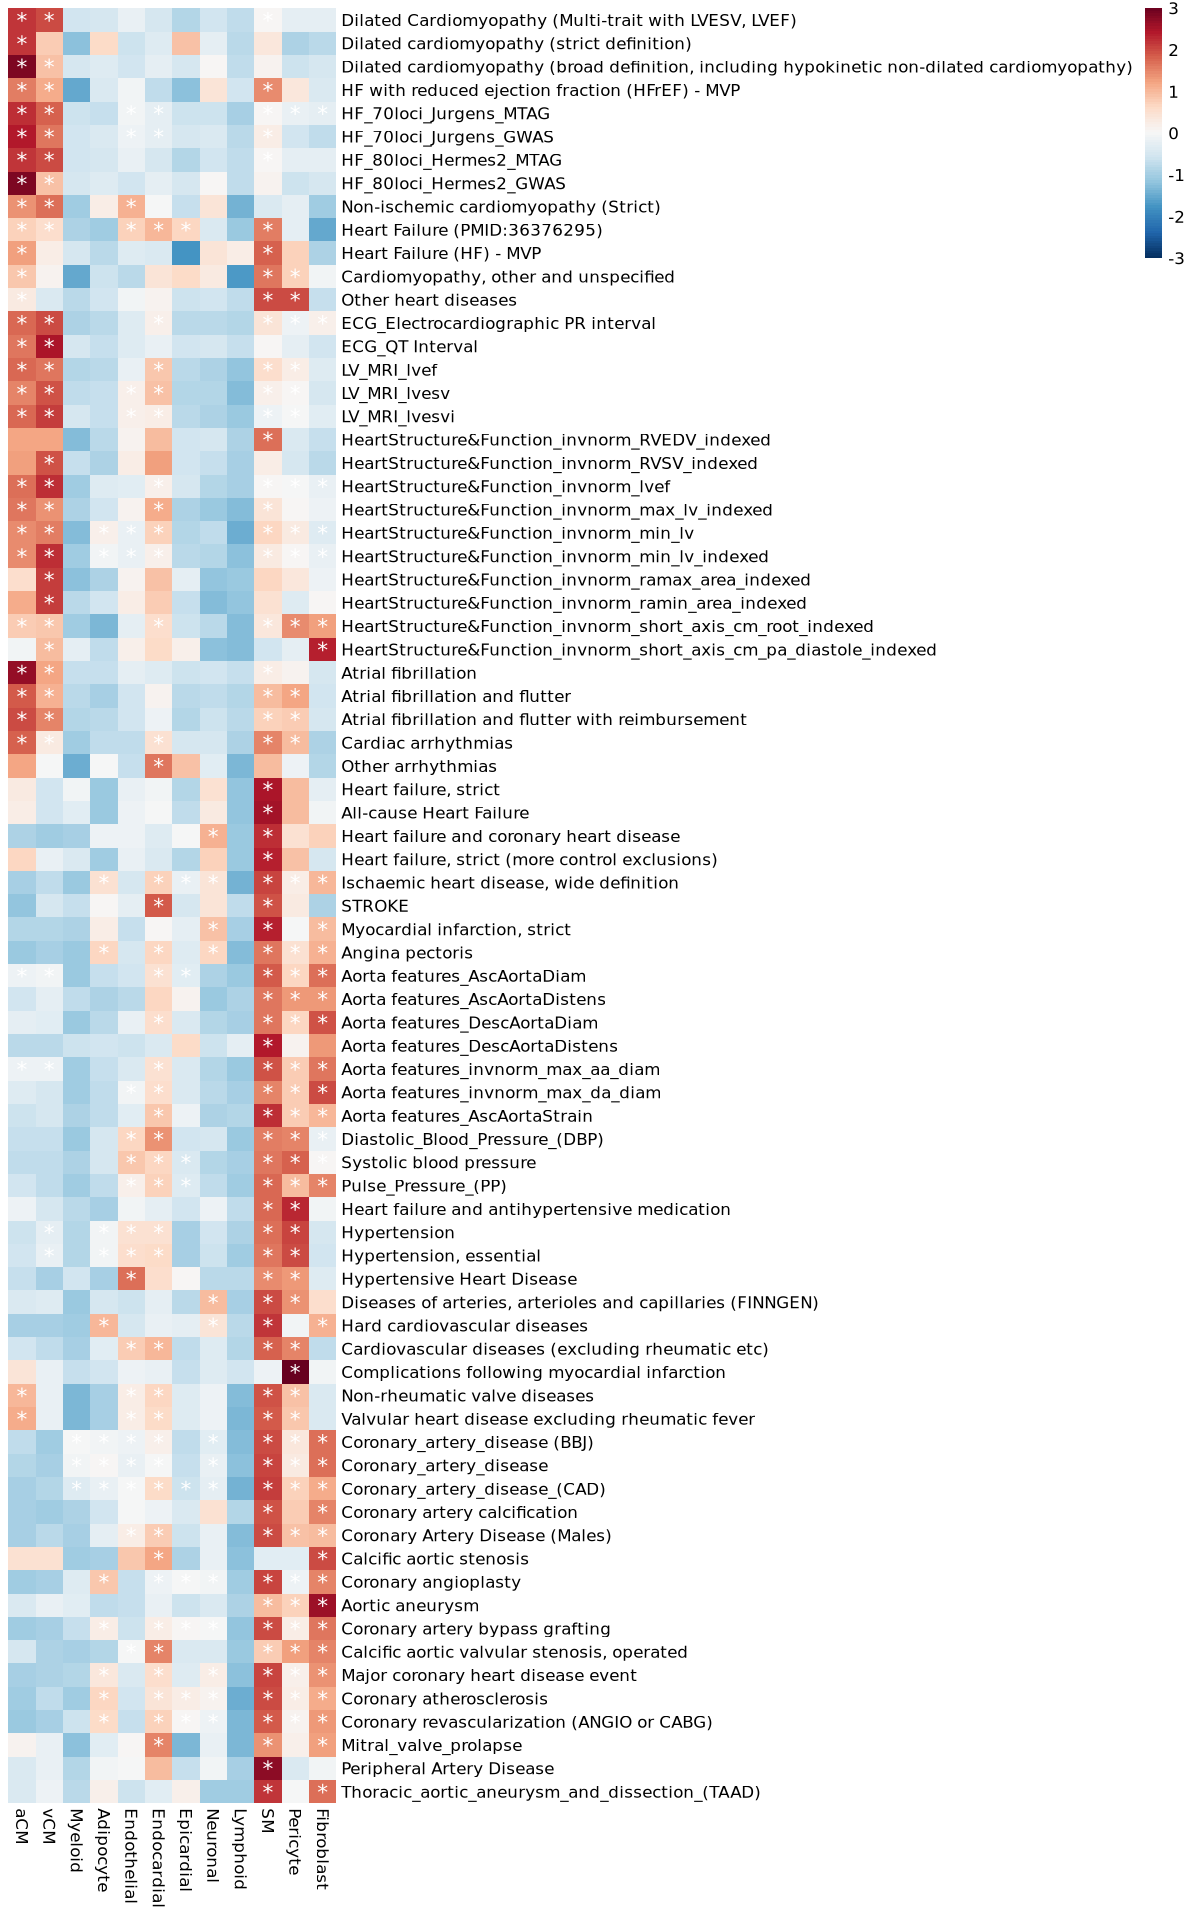

In [20]:
options(repr.plot.width=10, repr.plot.height=16)

# Plot heatmap
pheatmap(
  color = col,
  plotting_matrix,
  scale = "row", 
  breaks = breaks,
  cluster_rows = FALSE,       # Disable clustering since we sorted manually
  cluster_cols = FALSE,       # Disable clustering since we sorted manually
  border_color = NA,
  display_numbers = stars_matrix_plot, number_color = "white", fontsize_number = 13)

In [22]:
pheatmap(
  color = col,
  plotting_matrix,
  scale = "row", 
  breaks = breaks,
  cluster_rows = FALSE,       # Disable clustering since we sorted manually
  cluster_cols = FALSE,       # Disable clustering since we sorted manually
  border_color = NA,
  display_numbers = stars_matrix_plot, number_color = "white", fontsize_number = 16,
  filename = "/nfs/lab/projects/mega_heart/Plots_figures/GWAS-ATAC-V3.pdf",
  width = 10, height = 17
)